In [1]:
from random import random
import matplotlib.pyplot as plt
from matplotlib.pylab import *
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from copy import deepcopy

In [2]:
from numpy import linalg

def task1(mu):
    variance=0.02
    a = 0.99
    xi0 = 0
    
    sigu2 = 0.93627
    t = np.asarray(range(1, 5001))
    overall_W = None
    overall_error = None
    for iteration in range(100):
        mean, std_dvt = 0, math.sqrt(variance)
        epsilon = np.random.normal(mean, std_dvt, size=5000)

        x = [_ for _ in range(5000)]
        x[0] = epsilon[0]

        for i in range(1, 5000):
            if i == 1:
                x[1] = a*x[0] + epsilon[1]
            else:
                x[i] = a*x[i-1] + epsilon[i]

        x = np.asarray(x).reshape(5000, 1)

        Nout = x.shape[1]
        N = x.shape[0]

        W = 0
        Wo = []

        n = 0
        Wo.append(W)
        Wo = np.asarray(Wo)

        x_predict = np.zeros((5000, 1))
        error = np.zeros((5000, 1))
        norm_error = np.zeros((5000, 1))

        x_predict[n, :] = xi0 * W
        error[n, :] = x[n, :] - x_predict[n, :]
        norm_error[n] = linalg.norm(error[n, :])
        W = W + mu * error[n, :].T * xi0

        for n in range(1, N):
            Wo = np.append(Wo, W)
            x_predict[n, :] = x[n-1, :] * W
            error[n, :] = x[n, :] - x_predict[n, :]
            norm_error[n] = linalg.norm(error[n, :])
            W = W + mu * error[n, :].T * x[n-1, :]

        if iteration == 0:
            overall_W = np.copy(Wo)
            overall_error = np.copy(error)
        else:
            overall_W = np.concatenate((overall_W, np.copy(Wo)), axis=0)
            overall_error = np.concatenate((overall_error, np.copy(error)), axis=0)

    overall_W = overall_W.reshape(100, 5000)
    overall_error = overall_error.reshape((100, 5000))
    print('Done')

    J = sigu2*(1-a**2)*(1+(mu/2)*sigu2) + sigu2*(a**2+(mu/2)*(a**2)*sigu2-0.5*mu*sigu2)*(1-mu*sigu2)**(2*t)

    J_mean = np.mean(np.square(overall_error), axis=0)
    
    plt.semilogy(J, 'b--',label='Theory')
    plt.semilogy(J_mean, 'k--',label='Experiment')
    xlim(left=0)
    plt.legend()
    plt.show()
    return


Done


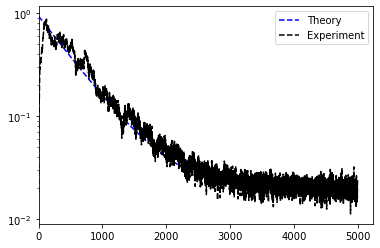

In [3]:
task1(0.001)

Done


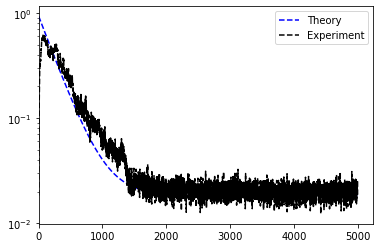

In [4]:
task1(0.002)

Done


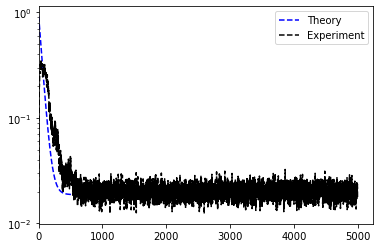

In [5]:
task1(0.01)

Done


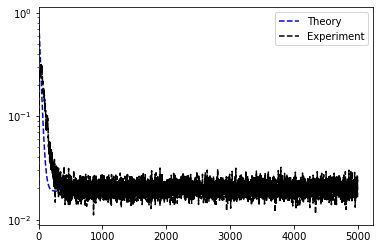

In [6]:
task1(0.02)

In [7]:
def predict(row,weights):
    activation = weights[0]
    for i in range(len(row) - 1):
        activation += weights[i+1] * row[i]
    return 1.0 if activation >= 0.0 else -1

In [8]:
def moon(num_points, distance, radius, width):
    '''
    Function to create the double moon
    '''

    points = num_points

    x1 = [0 for _ in range(points)]
    y1 = [0 for _ in range(points)]
    x2 = [0 for _ in range(points)]
    y2 = [0 for _ in range(points)]

    for i in range(points):
        d = distance
        r = radius
        w = width
        a = random() * math.pi
        x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + (
                    (-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
        y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

        a = random() * math.pi + math.pi
        x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + (
            (-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
        y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
    return ([x1, x2, y1, y2])

In [9]:
def processed_data(x1,x2,y1,y2,num_points):
    x1 = np.array(x1)
    x2 = np.array(x2)
    x = concatenate((x1, x2))
    output1 = np.ones(num_points)

    y1 = np.array(y1)
    y2 = np.array(y2)
    y = concatenate((y1, y2))
    output2 = np.zeros((num_points))

    XX = np.vstack([x, y])
    YY = np.concatenate((output1, output2))

    return XX.T, YY

In [21]:
def train(X, y, epochs, learningRate):

    Xn = np.ndarray.copy(X)
    yn = np.ndarray.copy(y)    

    #Normalise the X
    #X_mean = np.mean(Xn, axis=0)
    #X_std = np.std(Xn, axis=0)
    #Xn -= X_mean
    #X_std[X_std == 0] > 1
    Xn =(Xn-np.mean(Xn, axis=0))/  np.std(Xn, axis=0)

    #y_mean = yn.mean(axis=0)
    yn =yn- yn.mean(axis=0) 

    Xn = np.hstack((np.ones(Xn.shape[0])[np.newaxis].T, Xn))
    w = np.zeros(Xn[0].shape)
 
    mse_arr = []

    for i in range(epochs):
        sq_error = 0
        for x,y in zip(Xn, yn):
            response = np.dot(x, w)    
            error = y - response
            error_mse = (y) - predict(x[1:],w)
            sq_error += error_mse**2
            w = w + learningRate * x * error
        mse_arr.append(sq_error/len(Xn))
 
    return w, mse_arr

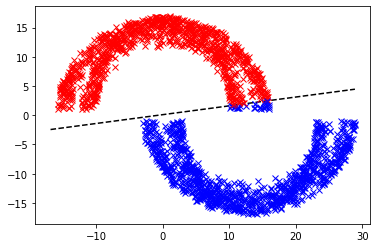

(0.0, 103.95)

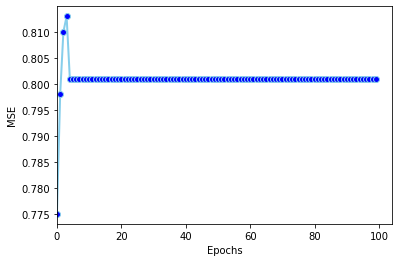

In [27]:
learning_rate = 0.001
x1,x2,y1,y2 = moon(1000, 1, 10, 6)
data = []
data.extend([x1[i], y1[i], 1] for i in range(1000))
data.extend([x2[i], y2[i], -1] for i in range(1000))
x,y=processed_data(x1,x2,y1,y2,1000)
w,mse2=train(x,y,100,learning_rate)

x = np.linspace(np.amin(data),np.amax(data),100)
y = -(w[0] + x*w[1])/w[2]
plt.plot(x, y, '--k')

for i in data:
    m = predict(i,w)
    if m == 1:
        plt.plot(i[0], i[1], marker='x', color='r',label="bl")
    else:
        plt.plot(i[0], i[1], marker='x', color='b',label='rd')
plt.show()
x,y=processed_data(x1,x2,y1,y2,1000)
weights,mse2=train(x,y,100,learning_rate)


iters = [i for i in range(100)]
plt.plot( iters, mse, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2, label="d = 1")
plt.ylabel('MSE')
plt.xlabel('Epochs')
xlim(left=0)

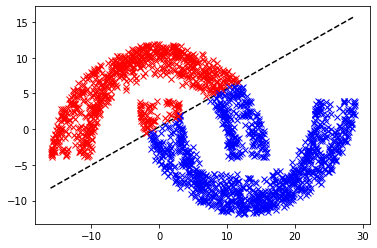

(0.0, 103.95)

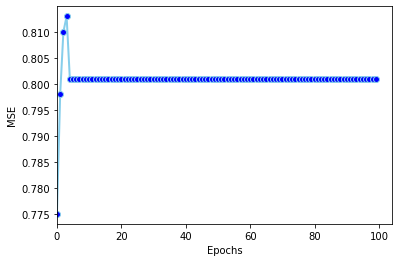

In [26]:
learning_rate = 0.001
x1,x2,y1,y2 = moon(1000, -4, 10, 6)

data = []
data.extend([x1[i], y1[i], 1] for i in range(1000))
data.extend([x2[i], y2[i], -1] for i in range(1000))
x,y=processed_data(x1,x2,y1,y2,1000)
w,mse2=train(x,y,100,learning_rate)

x = np.linspace(np.amin(data),np.amax(data),100)
y = -(w[0] + x*w[1])/w[2]
plt.plot(x, y, '--k')

for i in data:
    m = predict(i,w)
    if m == 1:
        plt.plot(i[0], i[1], marker='x', color='r',label="bl")
    else:
        plt.plot(i[0], i[1], marker='x', color='b',label='rd')
plt.show()
x,y=processed_data(x1,x2,y1,y2,1000)
weights,mse2=train(x,y,100,learning_rate)


iters = [i for i in range(100)]
plt.plot( iters, mse, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2, label="d = 1")
plt.ylabel('MSE')
plt.xlabel('Epochs')
xlim(left=0)

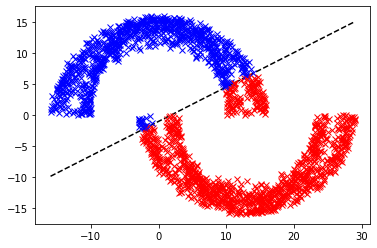

(0.0, 103.95)

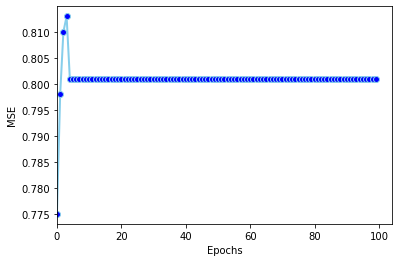

In [28]:
learning_rate = 0.001
x1,x2,y1,y2 = moon(2000, 0, 10, 6)
data = []
data.extend([x1[i], y1[i], 1] for i in range(1000))
data.extend([x2[i], y2[i], -1] for i in range(1000))
x,y=processed_data(x1,x2,y1,y2,1000)
w,mse2=train(x,y,100,learning_rate)

x = np.linspace(np.amin(data),np.amax(data),100)
y = -(w[0] + x*w[1])/w[2]
plt.plot(x, y, '--k')

for i in data:
    m = predict(i,w)
    if m == 1:
        plt.plot(i[0], i[1], marker='x', color='r',label="bl")
    else:
        plt.plot(i[0], i[1], marker='x', color='b',label='rd')
plt.show()
x,y=processed_data(x1,x2,y1,y2,1000)
weights,mse2=train(x,y,100,learning_rate)


iters = [i for i in range(100)]
plt.plot( iters, mse, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2, label="d = 1")
plt.ylabel('MSE')
plt.xlabel('Epochs')
xlim(left=0)